# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 


### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


In [31]:
cities[:5]

['dongsheng', 'damavand', 'sao filipe', 'chapleau', 'lebu']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print (url + "&q=San Francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=6b1bf7b24390e4ac73964b18d6eea75c&q=San Francisco


In [33]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
      # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=6b1bf7b24390e4ac73964b18d6eea75c
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dongsheng
Processing Record 2 of Set 1 | damavand
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | chapleau
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | saint anthony
Processing Record 11 of Set 1 | fereydun kenar
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | tabuk
Processing Record 14 of Set 1 | chechat
Processing Record 15 of Set 1 | le port
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | baykit
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 

Processing Record 35 of Set 4 | akdepe
Processing Record 36 of Set 4 | sioux lookout
Processing Record 37 of Set 4 | whitehaven
Processing Record 38 of Set 4 | sesheke
Processing Record 39 of Set 4 | bintulu
Processing Record 40 of Set 4 | viedma
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | tanout
Processing Record 43 of Set 4 | portland
Processing Record 44 of Set 4 | ambatofinandrahana
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | madison
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | bubaque
Processing Record 0 of Set 5 | seymchan
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | komsomolskiy
Processing Record 3 of Set 5 | uniao
Processing Record 4 of Set 5 | dickson
Processing Record 5 of Set 5 | namatanai
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | morondava
Processing

Processing Record 23 of Set 8 | geraldton
Processing Record 24 of Set 8 | saint-pierre
Processing Record 25 of Set 8 | tessalit
Processing Record 26 of Set 8 | homer
Processing Record 27 of Set 8 | maniitsoq
Processing Record 28 of Set 8 | bairiki
Processing Record 29 of Set 8 | namwala
Processing Record 30 of Set 8 | ancud
Processing Record 31 of Set 8 | halalo
City not found. Skipping...
Processing Record 32 of Set 8 | sahuaripa
Processing Record 33 of Set 8 | havelock
Processing Record 34 of Set 8 | scottsbluff
Processing Record 35 of Set 8 | leningradskiy
Processing Record 36 of Set 8 | mweka
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | chuy
Processing Record 39 of Set 8 | sinop
Processing Record 40 of Set 8 | pasaquina
Processing Record 41 of Set 8 | lagoa
Processing Record 42 of Set 8 | flinders
Processing Record 43 of Set 8 | nokaneng
Processing Record 44 of Set 8 | bam
Processing Record 45 of Set 8 | sao gabriel da cachoeira
Processing Record 46 o

Processing Record 13 of Set 12 | yulara
Processing Record 14 of Set 12 | elko
Processing Record 15 of Set 12 | bulgan
Processing Record 16 of Set 12 | bilma
Processing Record 17 of Set 12 | somerset east
Processing Record 18 of Set 12 | baghdad
Processing Record 19 of Set 12 | dombas
Processing Record 20 of Set 12 | ledyard
Processing Record 21 of Set 12 | honningsvag
Processing Record 22 of Set 12 | norman wells
Processing Record 23 of Set 12 | necochea
Processing Record 24 of Set 12 | bud
Processing Record 25 of Set 12 | lebanon
Processing Record 26 of Set 12 | yankton
Processing Record 27 of Set 12 | ayan
Processing Record 28 of Set 12 | vidim
Processing Record 29 of Set 12 | cururupu
Processing Record 30 of Set 12 | balotra
Processing Record 31 of Set 12 | chicama
Processing Record 32 of Set 12 | budhlada
Processing Record 33 of Set 12 | miri
Processing Record 34 of Set 12 | whitianga
Processing Record 35 of Set 12 | barghat
Processing Record 36 of Set 12 | el tocuyo
Processing Rec

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dongsheng,39.8161,109.9776,17.31,31,0,4.67,CN,1686254690
1,damavand,35.7178,52.0650,13.66,70,100,4.08,IR,1686254690
2,sao filipe,14.8961,-24.4956,24.70,82,8,2.53,CV,1686254690
3,chapleau,47.8405,-83.4034,19.05,45,100,3.60,CA,1686254690
4,lebu,-37.6167,-73.6500,13.48,94,100,5.93,CL,1686254690


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dongsheng,39.8161,109.9776,17.31,31,0,4.67,CN,1686254690
1,damavand,35.7178,52.0650,13.66,70,100,4.08,IR,1686254690
2,sao filipe,14.8961,-24.4956,24.70,82,8,2.53,CV,1686254690
3,chapleau,47.8405,-83.4034,19.05,45,100,3.60,CA,1686254690
4,lebu,-37.6167,-73.6500,13.48,94,100,5.93,CL,1686254690


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

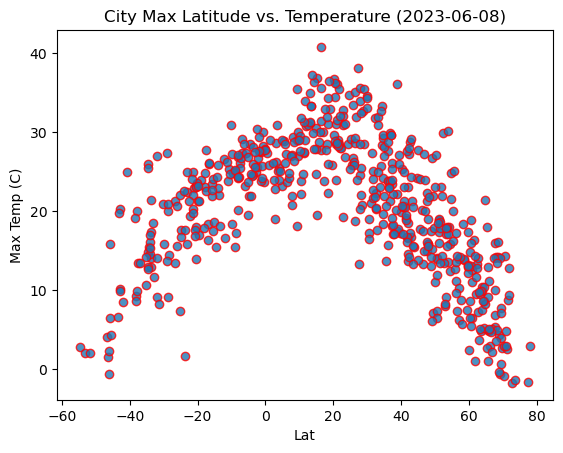

In [38]:
import time
import matplotlib.pyplot as plt


# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Lat")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

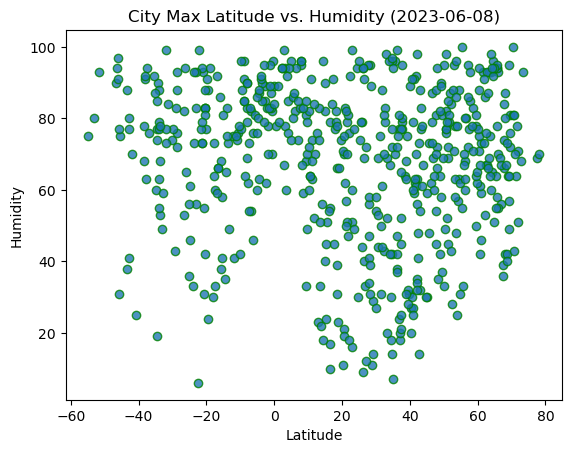

In [39]:
import time
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor= "green",
    linewidths= 1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

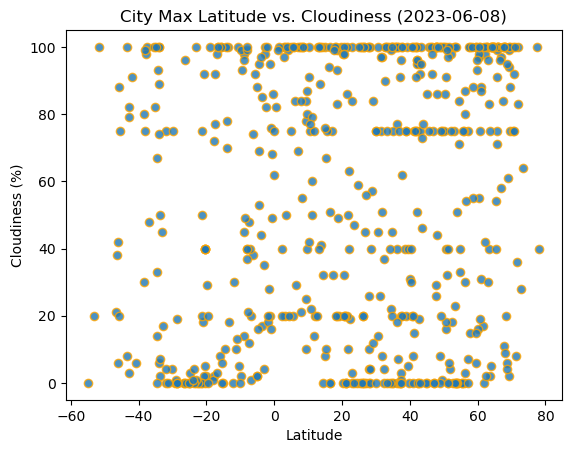

In [40]:
import time
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

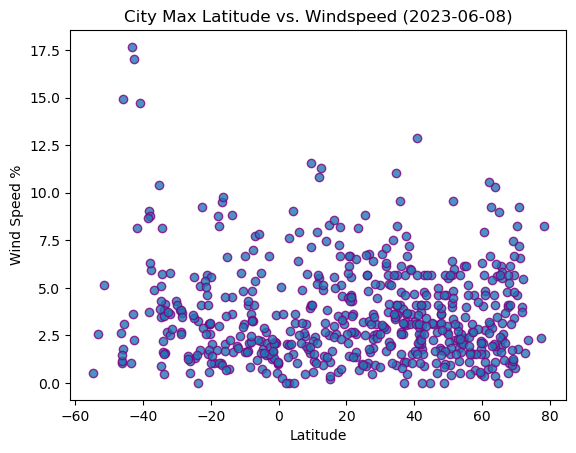

In [41]:
import time
# Build the scatter plots for latitude vs. wind speed

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Windspeed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed %")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def plot_linear_regression (x_value, y_value, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value,"r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "red")
    plt.xlabel("Lat ")
    plt.ylabel("title")
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude > 0)
northern_hemi_df =city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dongsheng,39.8161,109.9776,17.31,31,0,4.67,CN,1686254690
1,damavand,35.7178,52.0650,13.66,70,100,4.08,IR,1686254690
2,sao filipe,14.8961,-24.4956,24.70,82,8,2.53,CV,1686254690
3,chapleau,47.8405,-83.4034,19.05,45,100,3.60,CA,1686254690
5,provideniya,64.3833,-173.3000,8.66,65,100,1.67,RU,1686254690


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df =city_data_df[city_data_df["Lat"] <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,lebu,-37.6167,-73.6500,13.48,94,100,5.93,CL,1686254690
6,mataura,-46.1927,168.8643,-0.52,97,42,1.03,NZ,1686254691
7,puerto ayora,-0.7393,-90.3518,29.98,82,68,3.58,EC,1686254691
10,hermanus,-34.4187,19.2345,15.45,90,93,5.70,ZA,1686254691
13,le port,-20.9373,55.2919,22.98,93,18,1.54,RE,1686254691


###  Temperature (C) vs. Latitude Linear Regression Plot

The r-value is 0.6368634658188697


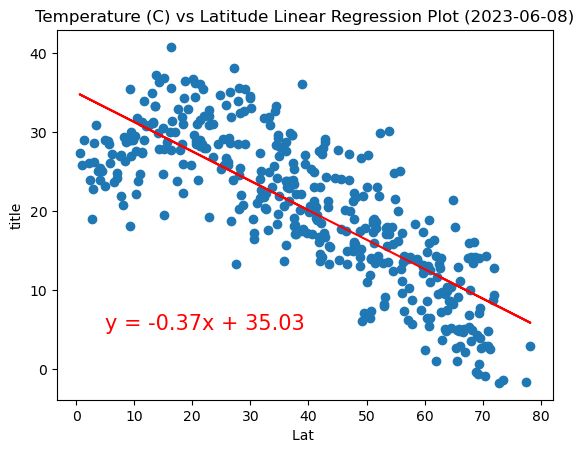

In [77]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Temperature (C) vs Latitude Linear Regression - North ({date})")
plot_linear_regression(x_values,y_values, "Max Temp", (5,5))

The r-value is 0.6008775162193128


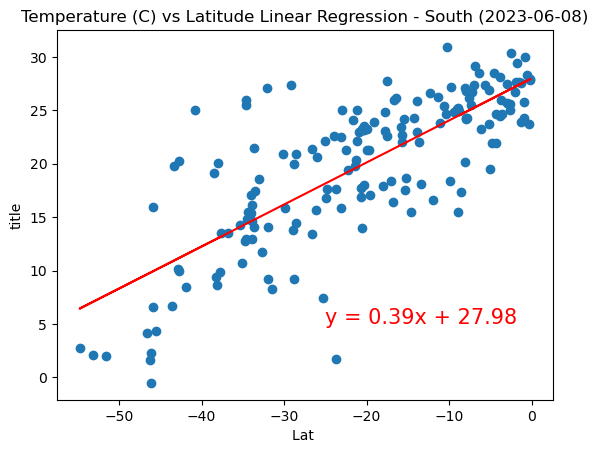

In [78]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Temperature (C) vs Latitude Linear Regression - South ({date})")
plot_linear_regression(x_values,y_values, "Max Temp", (-25,5))

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a negative relationship between latitude and temperature.  That is, as you move further away from the equator and the latitude gets larger, the temperature reduces.
In the southern hemisphere, there is a positive relationship between latitude and temperature.  That is, as you move further away from the equator and the latitude gets smaller the temperature reduces. 

### Humidity vs. Latitude Linear Regression Plot

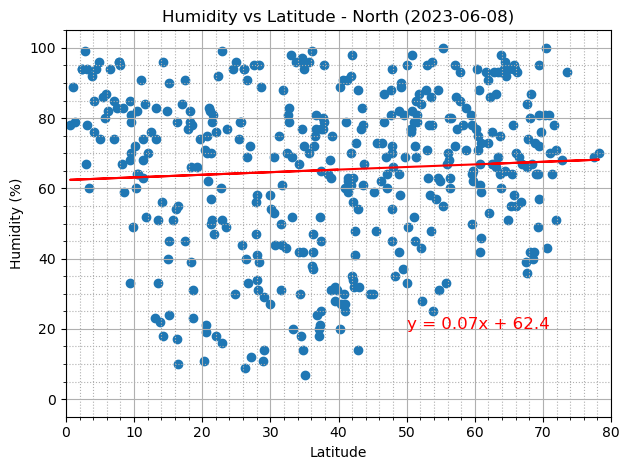

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title(f"Humidity vs Latitude - North ({date})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

plt.tight_layout()
plt.show()

In [48]:
southern_hemi_df["Lat"]
min(southern_hemi_df["Lat"])

-54.8

The r-value is 0.00994033544894508


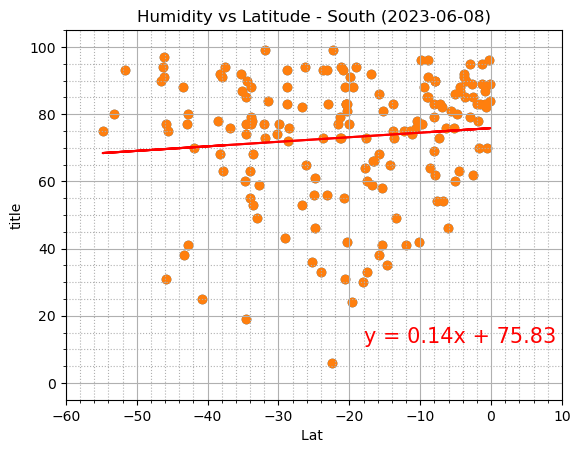

<Figure size 640x480 with 0 Axes>

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title(f"Humidity vs Latitude - South ({date})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(-60, 10)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plot_linear_regression(x_values,y_values, "Humidity", (-18,12))
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**
In the northern hemisphere, for every positive unit change in latitude as you move away from the equator, the humidity rises by 0.07.  
In the southern hemisphere, for every unit change in latitude as you move away from the equator, the humidity decreases slightly.
In both hemispheres, there is a lot of variation in the data and this is likely due to geographical features that affect climiate.  These feastures can occur at any latitude, for example, bodies of water, elevation, etc.  In the northern hemisphere, for every positive unit change in latitude as you move away from the equator, the humidity rises by 0.07.  
In the southern hemisphere, for every unit change in latitude as you move away from the equator, the humidity decreases slightly.  

### Cloudiness vs. Latitude Linear Regression Plot

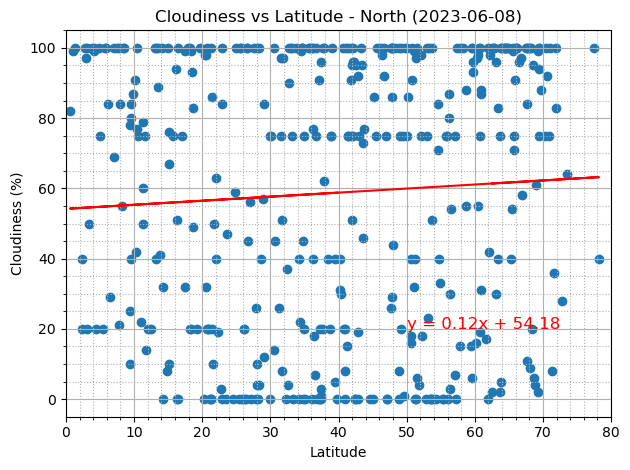

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title(f"Cloudiness vs Latitude - North ({date})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

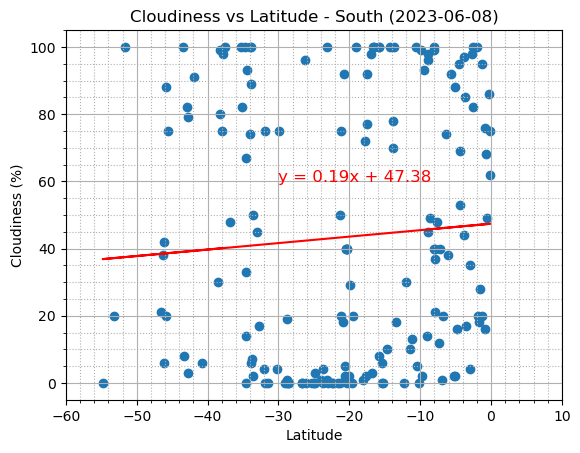

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title(f"Cloudiness vs Latitude - South ({date})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 10)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**
In the northern hemisphere, there is a slight positive correlation between an increase in latitude (distance from the equator) and cloudiness. 
In the southern hemisphere, there is a negative correlation between a decrease in latitude (distance from the equator) and cloudiness.  There is less cloudiness as you move to lower latitudes.
In both hemispheres, there is a lot of variation in the data and it seems to cluster more towards the extremes and there are fewer observations with an amount of clouds in the middle of the scale.

### Wind Speed vs. Latitude Linear Regression Plot

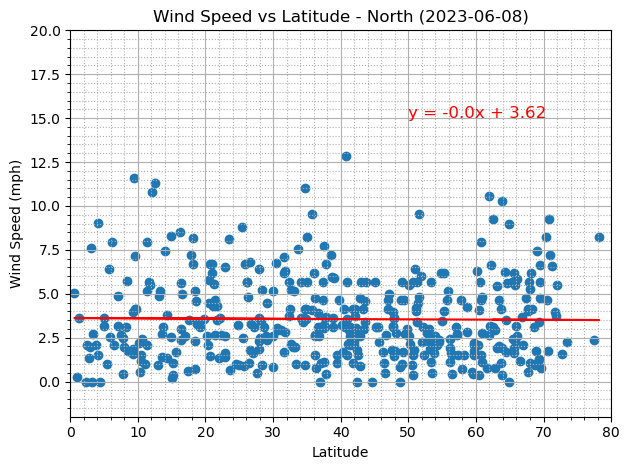

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title(f"Wind Speed vs Latitude - North ({date})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2, 20)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

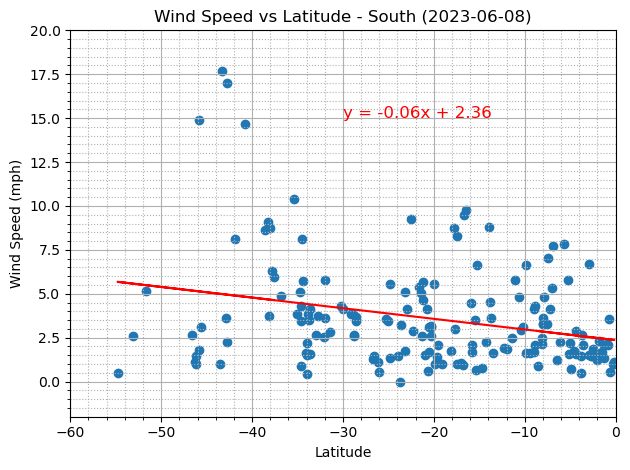

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title(f"Wind Speed vs Latitude - South ({date})")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2, 20)
plt.xlim(-60, 0)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**
In the northern hemisphere, the correlation of latitude and wind speed is negligible. In the southern hemisphere, there is a positive relationship betweena decrease in latitude and wind speed.  That is, the further you get from the equator, the more windy it is.